### Multi Layer Perceptron Classifier 
This will use the mulit layer perceptron classifier to construct a model on a training set, then perform analysis on the test data for performance evaluation.
https://scikit-learn.org/stable/modules/neural_networks_supervised.html


DXG - 2021-09-25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix

In [2]:
# User defined function for accuracy
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [3]:
# Load dataset
dataset = pd.read_csv('../featureSelectedDataset.csv')  
dataset.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",CO2 emissions from solid fuel consumption (% of total),Crop production index (2004-2006 = 100),Livestock production index (2004-2006 = 100),Permanent cropland (% of land area),"Population, female (% of total)",Rural population (% of total population),"Life expectancy at birth, total (years)",Year,CountryName,MeanLifeExpetancyOverall,MeanLifeExpetancyForYear,AboveAverageLifeExpectancyOverall,AboveAverageLifeExpectancyByYear
0,145.3210,11.947431,0.801756,51.614,35.807860,73.15,48.66,0.111816,48.634625,90.574,34.092878,1964,Afghanistan,64.193563,55.937218,False,False
1,46.6478,4.605392,3.168264,20.500,61.654161,34.23,61.43,0.021999,49.604197,16.890,70.880976,1964,Australia,64.193563,55.937218,True,True
2,56.3066,20.065391,0.229381,18.500,48.662900,93.29,72.46,0.811334,53.270334,35.038,69.921951,1964,Austria,64.193563,55.937218,True,True
3,88.5072,8.691025,0.378911,45.799,0.000000,18.74,35.63,0.709471,52.189871,88.199,39.136854,1964,Benin,64.193563,55.937218,False,False
4,100.5586,1.237884,0.336018,43.539,0.247525,24.62,20.76,0.126465,50.360061,62.043,43.430220,1964,Bolivia,64.193563,55.937218,False,False


In [4]:
# Split the dataset into features and obs

X = dataset.iloc[:,0:10]
y = dataset["AboveAverageLifeExpectancyByYear"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
# Fit the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [6]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print('Accuracy of KNNClassifier : ', accuracy(cm))

Accuracy of MLPClassifier :  0.9753146176185866


In [7]:
y_pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
print('Accuracy of KNNClassifier (training): ', accuracy(cm))

Accuracy of KNNClassifier (training):  0.9918912473169569


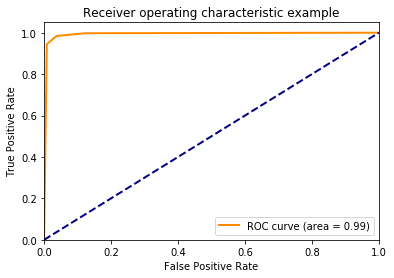

In [8]:
# Generate ROC plot
fpr2, tpr2, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('KNNClassfierROC.jpg', dpi=300)
plt.show()

In [9]:
X

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",CO2 emissions from solid fuel consumption (% of total),Crop production index (2004-2006 = 100),Livestock production index (2004-2006 = 100),Permanent cropland (% of land area),"Population, female (% of total)",Rural population (% of total population)
0,145.32100,11.947431,0.801756,51.614000,35.807860,73.150000,48.660000,0.111816,48.634625,90.574000
1,46.64780,4.605392,3.168264,20.500000,61.654161,34.230000,61.430000,0.021999,49.604197,16.890000
2,56.30660,20.065391,0.229381,18.500000,48.662900,93.290000,72.460000,0.811334,53.270334,35.038000
3,88.50720,8.691025,0.378911,45.799000,0.000000,18.740000,35.630000,0.709471,52.189871,88.199000
4,100.55860,1.237884,0.336018,43.539000,0.247525,24.620000,20.760000,0.126465,50.360061,62.043000
...,...,...,...,...,...,...,...,...,...,...
6254,84.36840,30.070682,0.135601,18.500000,72.813122,63.980000,80.210000,0.512545,51.567427,21.901000
6255,77.95060,19.606375,0.948912,21.700000,31.668591,45.860000,57.320000,0.204062,50.488993,28.866000
6256,62.75300,13.358473,0.887243,21.661000,2.716469,33.150000,58.160000,0.302823,50.074380,19.101000
6257,136.62780,3.291197,0.317951,45.607000,0.802505,38.580000,19.930000,0.656425,49.089366,35.023000
